In [1]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from ukbb_recessive.regression.regressions import read_results_excel
import ukbb_recessive.regression.plotting as plotting

sns.set_style("whitegrid")

# Add fonts
plotting.add_fonts(['../../../data/fonts'])
plotting.configure_matplotlib()

Added: .../ukbb_recessive/data/fonts/Arimo-VariableFont_wght.ttf


# Prepare datasets

## Phenotypes regressions on recessive vs other genes

In [2]:
tables_folder = '../../../data/tables'
output_folder = '../../../data/plots'

use_dataset = 'Roulette'

results_path = f"{tables_folder}/table_phenotype_analysis.xlsx"

# load flat table
phenotypes = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
phenotypes = phenotypes[phenotypes['feature'].str.contains("s_het")]

# add odds ratio distance
phenotypes = plotting.add_odds_ratio_intervals(phenotypes)
phenotypes = plotting.add_effect_size_intervals(phenotypes)

# filter out dataset
if use_dataset:
    phenotypes = phenotypes[phenotypes['dataset'] == use_dataset]

In [3]:
phenotypes['analysis'].unique().tolist()

['phenotype regressions on [s_het_recessive_all]',
 'phenotype regressions on [s_het_lof_without_AR]']

In [4]:
# Dictionary to rename target columns
renaming_dict_target = {
    'is_blond': 'Hair color', 
    'years_of_edu': 'Years of\neducation',
    'diagnosis_total_ICD10_cnt_log': 'Diagnoses\ncount (log)',
    'ICD_infertility': 'Infertility',
    'living_with_a_partner': 'Has partner',
    'fluid_intelligence_score': 'Fluid\nintelligence',
    'childlessness': 'Childlessness'
}

# select targets of interest
phenotypes = phenotypes[phenotypes['target'].isin(renaming_dict_target.keys())].copy()
phenotypes['target'] = phenotypes['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
phenotypes = phenotypes[phenotypes['gender'] == 'all']

# select analyses
renaming_dict_analyses = {
    'phenotype regressions on [s_het_recessive_all]' : 'PLPs in recessive genes',
    'phenotype regressions on [s_het_lof_without_AR]' : 'Singleton LoFs in non-recessive genes'
}

phenotypes = phenotypes[phenotypes['analysis'].isin(renaming_dict_analyses.keys())].copy()
phenotypes['analysis'] = phenotypes['analysis'].apply(lambda x: renaming_dict_analyses.get(x, x))

phenotypes.head(3)

dataset              feature    effect  odds_ratio  odds_ratio_lower  \
3   Roulette  s_het_recessive_all  0.533132    1.704261          1.111429   
11  Roulette  s_het_recessive_all  0.216826    1.242128          0.727424   
19  Roulette  s_het_recessive_all -1.856123    0.156277          0.066170   

    odds_ratio_upper odds_ratio_pretty       p_value  p_value_corrected  \
3           2.613308        OR = 1.704  1.316271e-03       1.316271e-02   
11          2.121023        OR = 1.242  2.965785e-01       2.965785e+00   
19          0.369091       ES = -1.856  2.649101e-08       2.649101e-07   

    bonferroni_correction_coef  ...  gender                 analysis  \
3                           10  ...     all  PLPs in recessive genes   
11                          10  ...     all  PLPs in recessive genes   
19                          10  ...     all  PLPs in recessive genes   

                                              formula    family  \
3   childlessness ~ s_het_recessive_all + age_at_r...  binomial   
11  is_blond ~ s_het_recessive_all + age_at_recrui...  binomial   
19  years_of_edu ~ s_het_recessive_all + age_at_re...  gaussian   

   p_value_pretty p_value_corrected_pretty odds_ratio_lower_distance  \
3       1.32×10⁻³                    0.013                  0.592832   
11          0.297                        1                  0.514704   
19      2.65×10⁻⁸                2.65×10⁻⁷                  0.090108   

   odds_ratio_upper_distance  effect_lower_distance  effect_upper_distance  
3                   0.909047               0.427485               0.427485  
11                  0.878895               0.535072               0.535072  
19                  0.212814               0.859412               0.859412  

[3 rows x 22 columns]

## Phenotypre regressions on synonymous variants

In [5]:
results_path = f"../../../data/tables/sampling/synonymous/table_synonymous_on_phenotype_analysis.xlsx"

# load flat table
synonymous = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
synonymous = synonymous[synonymous['feature'].str.contains("s_het")]

# add odds ratio distance
synonymous = plotting.add_odds_ratio_intervals(synonymous)
synonymous = plotting.add_effect_size_intervals(synonymous)

# filter out dataset
if use_dataset:
    synonymous = synonymous[synonymous['dataset'] == use_dataset]

In [6]:
# select targets of interest
synonymous = synonymous[synonymous['target'].isin(renaming_dict_target.keys())].copy()
synonymous['target'] = synonymous['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
synonymous = synonymous[synonymous['gender'] == 'all']

synonymous.head(3)

dataset              feature    effect  odds_ratio  odds_ratio_lower  \
0  Roulette  s_het_recessive_all  0.001099    1.001100          0.798049   
2  Roulette  s_het_recessive_all  0.201819    1.223627          0.786185   
4  Roulette  s_het_recessive_all  0.026315    1.026664          0.940356   

   odds_ratio_upper odds_ratio_pretty   p_value  n_observations  \
0          1.255814        OR = 1.001  0.990035          367414   
2          1.904467        ES = 0.202  0.239947          365723   
4          1.120894        ES = 0.026  0.440164          369181   

                   target gender  \
0           Childlessness    all   
2     Years of\neducation    all   
4  Diagnoses\ncount (log)    all   

                                            analysis  \
0  synonymous_on_phenotype regressions on [s_het_...   
2  synonymous_on_phenotype regressions on [s_het_...   
4  synonymous_on_phenotype regressions on [s_het_...   

                                             formula    family p_value_pretty  \
0  childlessness ~ s_het_recessive_all + age_at_r...  binomial           0.99   
2  years_of_edu ~ s_het_recessive_all + age_at_re...  gaussian           0.24   
4  diagnosis_total_ICD10_cnt_log ~ s_het_recessiv...  gaussian           0.44   

   odds_ratio_lower_distance  odds_ratio_upper_distance  \
0                   0.203051                   0.254714   
2                   0.437442                   0.680840   
4                   0.086308                   0.094230   

   effect_lower_distance  effect_upper_distance  
0               0.226685               0.226685  
2               0.442383               0.442383  
4               0.087812               0.087812

# Plot

In [7]:
# Create a function to format numbers with a comma as a thousand separator
def format_thousands(x):
    return f'{x:,.0f}'  # Use , as a thousand separator and format as integers

def plot_phenotypes(ax, y_order, plot_entity='odds_ratio', legend_loc='upper left'):

    group_order = ['Singleton LoFs in non-recessive genes', 'PLPs in recessive genes'][::-1]

    legend_kwargs = {
        "bbox_to_anchor": (0.0, 1., 1, .102), 
        "frameon": False,
        "mode": "expand", 
        "ncol": 1, 
        "labelspacing": 0.1, 
        "markerfirst": False, 
        'fontsize': plotting.MEDIUM_SIZE
    }

    colors=['#B048B5', '#046307',]

    vline_loc = 1 if plot_entity == 'odds_ratio' else 0

    plotted_data = plotting.plot_errorbar_grouped(df=phenotypes[phenotypes['target'].isin(y_order)].copy(), 
                                        axis=ax, y_column='target', group_column = 'analysis',  
                                        legend_loc=legend_loc, 
                                        legend_kwargs=legend_kwargs,
                                        group_scale=0.03, 
                                        y_scale=0.1,
                                        colors=colors,
                                        y_order=y_order, 
                                        group_order=group_order, 
                                        plot_entity=plot_entity, 
                                        vertical_loc=vline_loc, 
                                        horizontal=False)


    # plotting.configure_axis(ax, x_label='Odds ratio (99% CI)', y_label=None, ymargin=0.12)

    # Display p-values or any other information in the sidebar
    p_values = plotted_data['p_value_corrected_pretty']
    or_values = plotted_data[plot_entity] 
    positions = plotted_data['y']

    plot_loc = plotted_data[f'{plot_entity}'] - plotted_data[f'{plot_entity}_lower_distance']

    for i, (loc, p, oddsr, pos) in enumerate(zip(plot_loc, p_values, or_values, positions)):
        ax.text(loc, pos+0.005, f'{round(oddsr, 2)}   {p}', va='center', size=plotting.MEDIUM_SIZE)

def plot_synonymous(ax, targets, plot_entity='odds_ratio', vline_loc=1):

    # select necessary targets
    data_syns = synonymous[synonymous['target'].isin(targets)].copy()
    data_plps = phenotypes[phenotypes['target'].isin(targets) & (phenotypes['analysis'] == 'PLPs in recessive genes')].copy()

    # sort dataset according to the target order
    data_syns.target = pd.Categorical(data_syns.target, categories=targets)
    data_syns = data_syns.sort_values('target')

    data_plps.target = pd.Categorical(data_plps.target, categories=targets)
    data_plps = data_plps.sort_values('target')

    # plot neutral line
    ax.vlines(x=vline_loc, ymin=-3, ymax=10, color='grey', linestyle='--', alpha=0.5, linewidth=0.5)
    
    vp = sns.violinplot(data=data_syns[(data_syns['gender'] == 'all')], y='target', x=plot_entity, hue='target',
                ax=ax, linewidth=0.5, linecolor='k', palette=['#a0b4ff'])

    # plot PLPs estimation
    pp = sns.pointplot(data=data_plps[(data_plps['gender'] == 'all') & (data_plps['target'].isin(targets))], y='target', x=plot_entity,
                    linestyle='none', markers='o', ax=ax, color='#ffa260', markersize=3, markeredgewidth=0.5, markeredgecolor='k')

/tmp/ipykernel_11170/3991403215.py:65: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  vp = sns.violinplot(data=data_syns[(data_syns['gender'] == 'all')], y='target', x=plot_entity, hue='target',


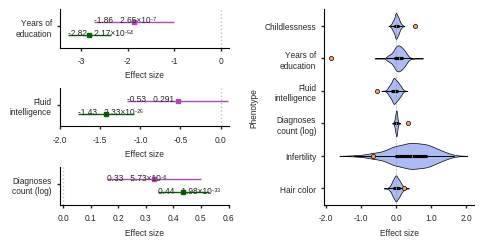

In [12]:
import matplotlib.ticker as ticker

cm = 1/2.54  # centimeters in inches
k = 1.
fig = plt.figure(constrained_layout=True, figsize=(12*cm*k, 6*cm*k))

# divide subfigure into left and right parts
subfigs = fig.subfigures(nrows=1, ncols=2, width_ratios=[1, 1], wspace=0.03)

# plot phenotypes results
ax_left = subfigs[0].subplots(3, 1)

# years of education
plot_phenotypes(ax_left[0], y_order=['Years of\neducation'], plot_entity='effect', legend_loc=None)
plotting.configure_axis(ax_left[0], x_label='Effect size',  ymargin=1, format_x=True)
ax_left[0].set_xticks([-3, -2, -1, 0])
ax_left[0].set_xticklabels([-3, -2, -1, 0])

# fluid intelligence
plot_phenotypes(ax_left[1], y_order=['Fluid\nintelligence'], plot_entity='effect',legend_loc=None)
plotting.configure_axis(ax_left[1], xlim=(-2, 0.1), x_label='Effect size',  ymargin=1, format_x=True)
ax_left[1].set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0])
ax_left[1].set_xticklabels([-2.0, -1.5, -1.0, -0.5, 0.0])

# diagnoses count
plot_phenotypes(ax_left[2], y_order=['Diagnoses\ncount (log)'], plot_entity='effect', legend_loc=None)
plotting.configure_axis(ax_left[2], xlim=(-0.01, 0.6), x_label='Effect size',  ymargin=1, format_x=True)
ax_left[2].set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax_left[2].set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# # infertility
# plot_phenotypes(ax_left[3], y_order=['Infertility'], plot_entity='odds_ratio', legend_loc=None)
# plotting.configure_axis(ax_left[3], xlim=(-0.1, 6), x_label=None,  ymargin=0.6, format_x=True)
# ax_left[3].set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax_left[3].set_xticklabels([0, 1, 2, 3, 4, 5, 6])

# plot synonymous
ax_right = subfigs[1].subplots(1, 1)

plot_synonymous(ax_right, targets = ['Childlessness', 'Years of\neducation', 'Fluid\nintelligence', 
                                     'Diagnoses\ncount (log)', 'Infertility', 'Hair color'], plot_entity='effect', vline_loc=0)

plotting.configure_axis(ax_right, x_label='Effect size', y_label='Phenotype', xlim=None, ymargin=0.02, format_x=True)

# save figure
plt.savefig(f"{output_folder}/figure_2.pdf", format="pdf", bbox_inches="tight")